In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from collections import Counter

In [ ]:
folder_path = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\Raw\full_contract_txt"

data = []

for file in os.listdir(folder_path):
    if file.endswith(".txt"):
        with open(os.path.join(folder_path, file), "r", encoding="utf-8") as f:
            text = f.read()
            data.append([file, text])


df = pd.DataFrame(data, columns=["filename", "content"])
df.head()


,filename,content
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13\n\n ...
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.2...
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...


In [ ]:
df.shape

(510, 2)

Finding shape of the DataFrame(text_files) where it contains 510 rows and 2 columsn

In [ ]:
df.isnull().sum()


filename    0
content     0
dtype: int64

Finding Sum of the Null Values for Each Column

In [ ]:
df["length"] = df["content"].str.len()
df[["filename", "length"]].head()


,filename,length
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,29454
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,26346
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,13038
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,89484
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,24632


Lengths of Each file

In [ ]:
import json
json_file = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\Raw\CUAD_v1.json"


with open(json_file, "r", encoding="utf-8") as f:
    cuad_json = json.load(f)

print("Total labeled contracts:", len(cuad_json["data"]))


Total labeled contracts: 510


"510" labeled contracts are present

In [ ]:
df_clauses = pd.read_csv(r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\Raw\master_clauses.csv")

df_clauses.head()


,Filename,Document Name,Document Name-Answer,Parties,Parties-Answer,Agreement Date,Agreement Date-Answer,Effective Date,Effective Date-Answer,Expiration Date,...,Liquidated Damages,Liquidated Damages-Answer,Warranty Duration,Warranty Duration-Answer,Insurance,Insurance-Answer,Covenant Not To Sue,Covenant Not To Sue-Answer,Third Party Beneficiary,Third Party Beneficiary-Answer
0,CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605...,['MARKETING AFFILIATE AGREEMENT'],MARKETING AFFILIATE AGREEMENT,"['BIRCH FIRST GLOBAL INVESTMENTS INC.', 'MA', ...","Birch First Global Investments Inc. (""Company""...","['8th day of May 2014', 'May 8, 2014']",5/8/14,['This agreement shall begin upon the date of ...,NaN,['This agreement shall begin upon the date of ...,...,[],No,"[""COMPANY'S SOLE AND EXCLUSIVE LIABILITY FOR T...",Yes,[],No,[],No,[],No
1,EuromediaHoldingsCorp_20070215_10SB12G_EX-10.B...,['VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT'],VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT,"['EuroMedia Holdings Corp.', 'Rogers', 'Rogers...","Rogers Cable Communications Inc. (""Rogers""); E...","['July 11 , 2006']",7/11/06,"['July 11 , 2006']",7/11/06,"['The term of this Agreement (the ""Initial Ter...",...,[],No,[],No,[],No,[],No,[],No
2,FulucaiProductionsLtd_20131223_10-Q_EX-10.9_83...,['CONTENT DISTRIBUTION AND LICENSE AGREEMENT'],CONTENT DISTRIBUTION AND LICENSE AGREEMENT,"['Producer', 'Fulucai Productions Ltd.', 'Conv...","CONVERGTV, INC. (“ConvergTV”); Fulucai Product...","['November 15, 2012']",11/15/12,"['November 15, 2012']",11/15/12,[],...,[],No,[],No,[],No,[],No,[],No
3,GopageCorp_20140221_10-K_EX-10.1_8432966_EX-10...,['WEBSITE CONTENT LICENSE AGREEMENT'],WEBSITE CONTENT LICENSE AGREEMENT,"['PSiTech Corporation', 'Licensor', 'Licensee'...","PSiTech Corporation (""Licensor""); Empirical Ve...","['Feb 10, 2014']",2/10/14,"['Feb 10, 2014']",2/10/14,['The initial term of this Agreement commences...,...,[],No,[],No,[],No,[],No,[],No
4,IdeanomicsInc_20160330_10-K_EX-10.26_9512211_E...,['CONTENT LICENSE AGREEMENT'],CONTENT LICENSE AGREEMENT,"['YOU ON DEMAND HOLDINGS, INC.', 'Licensor', '...",Beijing Sun Seven Stars Culture Development Li...,"['December 21, 2015']",12/21/15,"['December 21, 2015']",12/21/15,"['The Term of this Agreement (the ""Term"") shal...",...,[],No,[],No,[],No,[],No,[],No


In [ ]:
df_clauses.shape

(510, 83)

master clause csv file contains 510 rows and 83 columns

In [ ]:
total_qust= 0
total_ans = 0

for contract in cuad_json["data"]:
    for para in contract["paragraphs"]:
        for qa in para["qas"]:
            total_qust += 1
            if not qa["is_impossible"]:
                total_ans += 1

print("Total QAs:", total_qust)
print("Questions with answers:", total_ans)
print("Unanswerable questions:", total_qust - total_ans)


Total QAs: 20910
Questions with answers: 6702
Unanswerable questions: 14208


Json file contains 20910 Questions and Answers
                    , 6702 Questions with answers  and
                    14208 Questions are without answers

In [ ]:
clause_counter = Counter()

for contract in cuad_json["data"]:
    for para in contract["paragraphs"]:
        for qa in para["qas"]:
            clause_counter[qa["question"]] += 1

clause_counter.most_common(10)


[('Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract',
  510),
 ('Highlight the parts (if any) of this contract related to "Parties" that should be reviewed by a lawyer. Details: The two or more parties who signed the contract',
  510),
 ('Highlight the parts (if any) of this contract related to "Agreement Date" that should be reviewed by a lawyer. Details: The date of the contract',
  510),
 ('Highlight the parts (if any) of this contract related to "Effective Date" that should be reviewed by a lawyer. Details: The date when the contract is effective\xa0',
  510),
 ('Highlight the parts (if any) of this contract related to "Expiration Date" that should be reviewed by a lawyer. Details: On what date will the contract\'s initial term expire?',
  510),
 ('Highlight the parts (if any) of this contract related to "Renewal Term" that should be reviewed by a lawyer. Details: What is the renewal term

In [ ]:
len(cuad_json["data"])


510

length of the Json file is "510"

In [ ]:
from collections import Counter
clause_counter = Counter()

for contract in cuad_json["data"]:
    for para in contract["paragraphs"]:
        for qa in para["qas"]:
            clause_counter[qa["question"]] += 1

freq_df = pd.DataFrame(clause_counter.items(), columns=["Clause", "Count"]).sort_values("Count", ascending=False)
freq_df.head(15)


,Clause,Count
0,Highlight the parts (if any) of this contract ...,510
1,Highlight the parts (if any) of this contract ...,510
2,Highlight the parts (if any) of this contract ...,510
3,Highlight the parts (if any) of this contract ...,510
4,Highlight the parts (if any) of this contract ...,510
5,Highlight the parts (if any) of this contract ...,510
6,Highlight the parts (if any) of this contract ...,510
7,Highlight the parts (if any) of this contract ...,510
8,Highlight the parts (if any) of this contract ...,510
9,Highlight the parts (if any) of this contract ...,510


This shows which legal clauses appear most often

In [ ]:
Q1 = df["length"].quantile(0.25)
Q3 = df["length"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["length"] < lower_bound) | (df["length"] > upper_bound)]
outliers


,filename,content,length
12,AimmuneTherapeuticsInc_20200205_8-K_EX-10.3_11...,Exhibit 10.3\n\n[***] Certain information in t...,167973
15,ALAMOGORDOFINANCIALCORP_12_16_1999-EX-1-AGENCY...,ALAMOGORDO FINANCIAL CORPORATION ...,143307
32,"Array BioPharma Inc. - LICENSE, DEVELOPMENT AN...",[ * ] = Certain confidential information conta...,272018
38,ATHENSBANCSHARESCORP_11_02_2009-EX-1.2-AGENCY ...,Exhibit 1.2\n\nATHENS BANCSHARES CORPORATION ...,145307
40,AtnInternationalInc_20191108_10-Q_EX-10.1_1187...,Exhibit 10.1 CERTAIN CONFIDENTIAL PORTIONS OF ...,228943
44,AzulSa_20170303_F-1A_EX-10.3_9943903_EX-10.3_M...,Execution version\n\nExhibit 10.3\n\nCONFIDENT...,233248
49,"BELLICUMPHARMACEUTICALS,INC_05_07_2019-EX-10.1...",Exhibit 10.1 [***] = Certain confidential info...,188674
55,"BERKELEYLIGHTS,INC_06_26_2020-EX-10.12-COLLABO...",Exhibit 10.12\n\n[***] Certain information in ...,209067
75,BONTONSTORESINC_04_20_2018-EX-99.3-AGENCY AGRE...,EXHIBIT 99.3 Case 18-10248- MFW Doc 632-1 File...,161626
78,BUFFALOWILDWINGSINC_06_05_1998-EX-10.3-FRANCHI...,"BW-3 FRANCHISE SYSTEMS, INC. ...",154495


Q1 (25th percentile): 25% of files are shorter than this length

Q3 (75th percentile): 75% of files are shorter than this length

IQR = Q3-Q1(which is used to find the outliers(the files which are unusually small or unusually large))

*lower bound = Q1-1.5 * IQR and upper bound = Q1+1.5 * 1QR

*Any files outside this range are found to be outliers

In [ ]:
len(outliers)

45

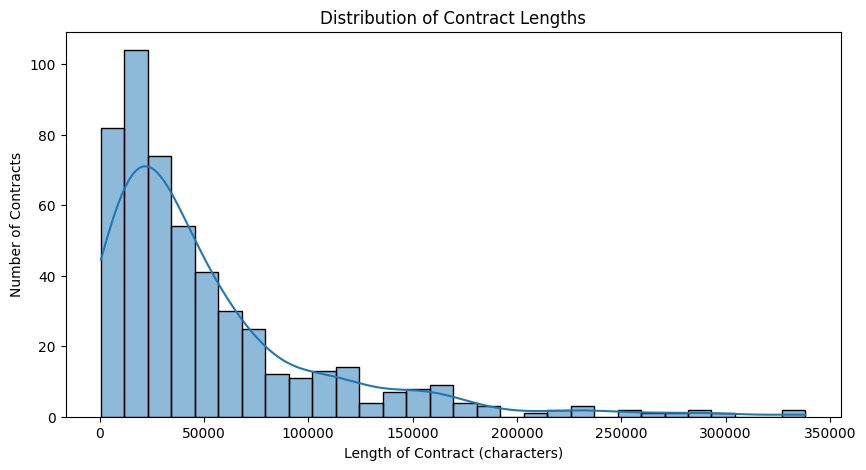

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["length"], bins=30, kde=True)

plt.title("Distribution of Contract Lengths")
plt.xlabel("Length of Contract (characters)")
plt.ylabel("Number of Contracts")

plt.show()


Below is the Histogram which is drawn using lengths of the contracts:

    * It shows how long each contracts are there and how many contracts fall into each length range.

    * This plays a crucial role in understanding the data complexity ,planing about multi agents and optimize chuncking and analysis.

    * The large Contracts are present which are too far from remaining contracts those are known are outliers.So,We need to handle them using Chunking etc.

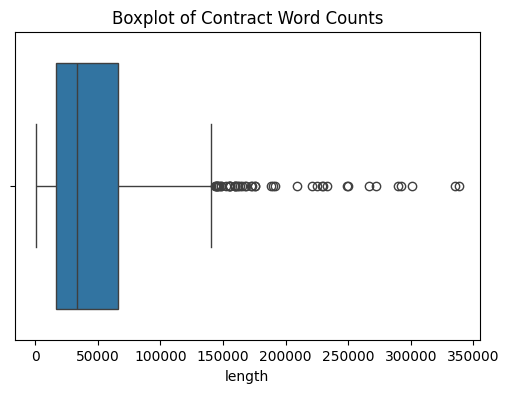

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['length'])
plt.title("Boxplot of Contract Word Counts")
plt.show()


Understanding about Boxplot:

* Blue Box represent the middle 50% of contracts:

                -> Bottom of Box(Q1) - 25% of contracts are short than this value
                -> Top of Box(Q3) - 75% of contracts are short than this value
                ->Height of the Box(IQR) - helps to identify whether the dataset is consistent or highly variable.

* The Bold line(Median)[vertical line inside the box]:

          -> median is closer to the lower part of the box
          -> many contracts are short
          ->A few very long contracts are upto average

* The circle at right are the outliers which are too long from remaining data.These needs cleaning before chunking.

In [ ]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS

all_text = " ".join(df["content"].tolist()).lower() # combine all content

words = re.findall(r"\b[a-zA-Z]{3,}\b", all_text)

legal_stopwords = {"herein", "thereof", "agreement", "party", "contract"}
stopwords = STOPWORDS.union(legal_stopwords) # stopwords are like it, the,are etc

filtered_words = [w for w in words if w not in stopwords]
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(20)
top_words


[('will', 19196),
 ('may', 13597),
 ('parties', 13523),
 ('section', 13350),
 ('company', 12637),
 ('information', 10941),
 ('product', 10920),
 ('date', 10181),
 ('including', 9924),
 ('time', 9453),
 ('use', 8912),
 ('provided', 8229),
 ('products', 8201),
 ('rights', 8067),
 ('services', 7889),
 ('applicable', 7540),
 ('business', 7342),
 ('set', 7058),
 ('confidential', 6915),
 ('upon', 6879)]

We need to import re (regular expressions) to evaluate the certain pattern and solve the Queries

* wordcloud is nothing but finding the most frequent words from all contract files

* legal_stopwords are nothing but the words which we think they will appear most. So,we need to mention them to remove from the actual list.

* stop words are nothing but the words which we appears most like it,the,are etc.So,we need to exclude them

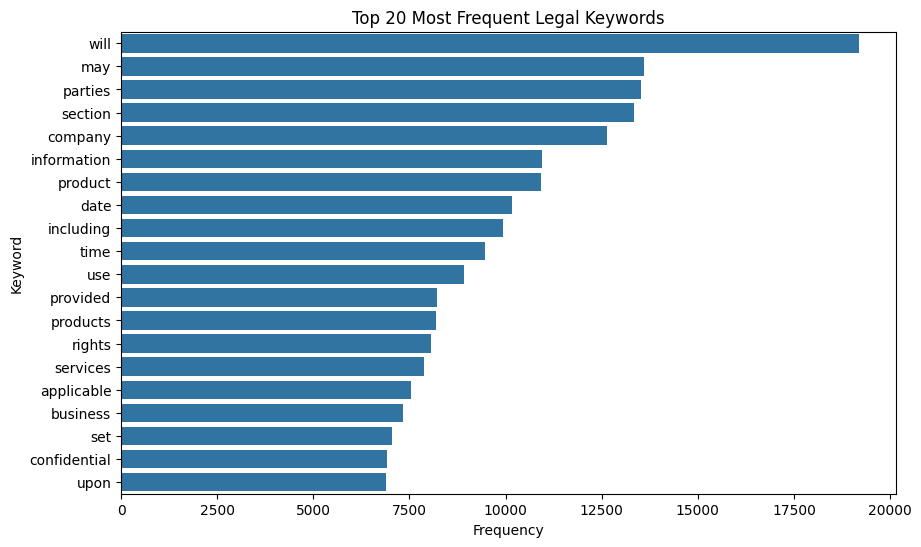

In [ ]:
top_words = word_freq.most_common(20)

words = [w for w, c in top_words]
counts = [c for w, c in top_words]

plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=words)
plt.title("Top 20 Most Frequent Legal Keywords")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()


bar plot between most frequent 20 words and there lengths

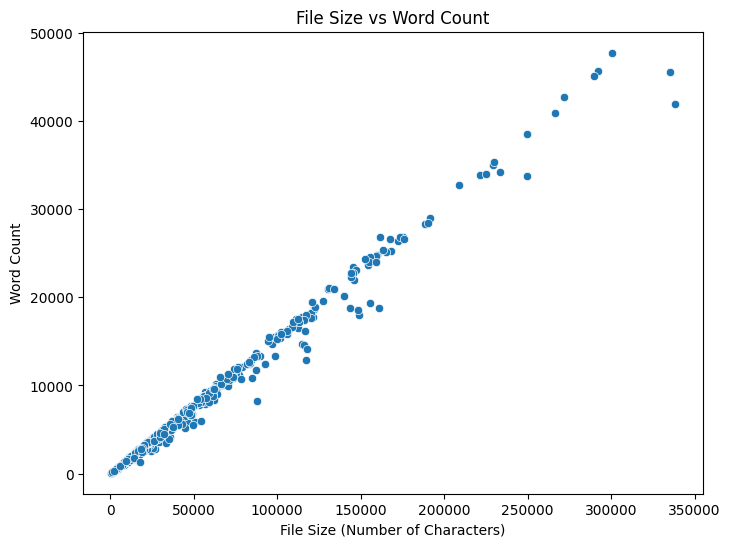

In [ ]:
word_counts = df["content"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,6))

sns.scatterplot(
    x=df["length"],
    y=word_counts
)

plt.xlabel("File Size (Number of Characters)")
plt.ylabel("Word Count")
plt.title("File Size vs Word Count")
plt.show()


Understanding scatter plot: understanding if a contract has more characters does it  contains more words.

* The graph shows that, the points form a tight upward slopping line which means:

    -> As file size increases   word count also increases almost proportionally .

    -> larger contract have more words.

    -> this shows, Strong linear relationship.

In [ ]:
import re
import pandas as pd

cleaned_data = []

def clean_contract(text):
    text = re.sub(r"Page\s+\d+(\s+of\s+\d+)?", "", text, flags=re.IGNORECASE)  # removing page numbers like page 3 or page 3 of 10

    text = re.sub(r"^\s*\d+\s*$", "", text, flags=re.MULTILINE) # remove standalone page no. like 3,6

    text = re.sub(r"^[A-Z][A-Z\s]{5,}$", "", text, flags=re.MULTILINE) # remove repeated headers(ALL CAPS) like TERMINATION OF AGREEMENT

    footer_keywords = ["CONFIDENTIAL", "PROPRIETARY", "DRAFT", "COPYRIGHT"] # remove footer text like "CONFIDENTIAL", "PROPRIETARY"
    for word in footer_keywords:
        text = re.sub(rf"^{word}.*$", "", text, flags=re.MULTILINE)

    text = re.sub(r"\n{2,}", "\n\n", text)   # Keep paragraph structure
    text = re.sub(r"[ \t]+", " ", text)      # Remove tabs and long spaces

    return text.strip()

for i, row in df.iterrows():
    file = row["filename"]
    content = row["content"]

    cleaned_text = clean_contract(content)
    cleaned_data.append([file, cleaned_text])

df_clean = pd.DataFrame(cleaned_data, columns=["filename", "content"])
df_clean["length"] = df_clean["content"].str.len()
df_clean.head()


,filename,content,length
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...,28833
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,26278
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13\n\n JOINT VENTURE AGREEMENT\n\nC...,11906
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.24B-...,86837
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,"This Agreement is entered into on January 13, ...",24087


Removing Header and Footer of the contract file's content:

* removing page number like page 3 or page 3 of 10

* removing stand line page numbers like 6 ,7

* removing repeated Headers

* removing Footer with footer_kewords

* normalizing whitespace

* Maintaining Paragraph Structure

==> after performing all of them, storing the cleaned data into a data frame called df_clean.

In [ ]:
#original df
df_orig = df.rename(columns={
    "content": "raw_content",
    "length": "raw_length"
})

#cleaned df
df_clean2 = df_clean.rename(columns={
    "content": "clean_content",
    "length": "clean_length"
})
df_merged = df_orig.merge(
    df_clean2[["filename", "clean_content", "clean_length"]],
    on="filename",
    how="left"
)
df_merged.head()

,filename,raw_content,raw_length,clean_content,clean_length
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...,29454,CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...,28833
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,26346,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,26278
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13\n\n ...,13038,EXHIBIT 10.13\n\n JOINT VENTURE AGREEMENT\n\nC...,11906
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.2...,89484,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.24B-...,86837
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...,24632,"This Agreement is entered into on January 13, ...",24087


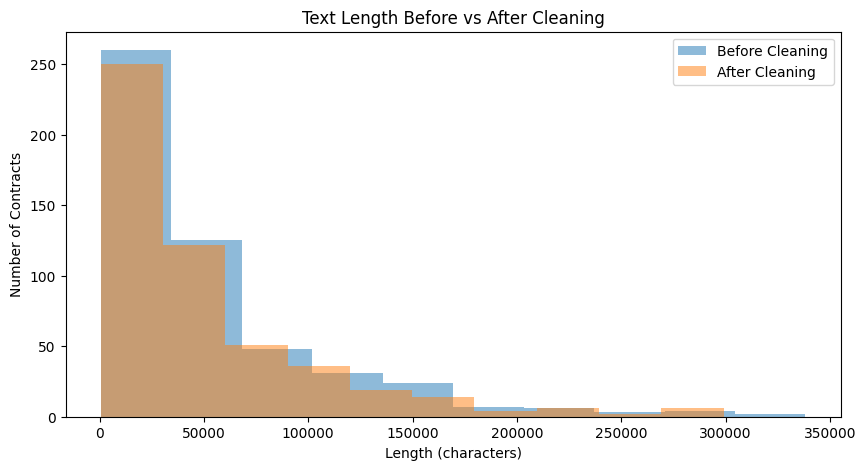

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df["length"], alpha=0.5, label="Before Cleaning")
plt.hist(df_clean["length"], alpha=0.5, label="After Cleaning")
plt.legend()
plt.title("Text Length Before vs After Cleaning")
plt.xlabel("Length (characters)")
plt.ylabel("Number of Contracts")
plt.show()


Ploting Histogram between original data's length and cleaned data's length

It shows different between the two different lengths

In [ ]:
import re

def normalize_whitespace(text):
    if not isinstance(text, str):
        return ""
    text = text.replace("\t", " ")  #remove tabs
    text = re.sub(r" {2,}", " ", text) #multiple spaces to one space
    text = re.sub(r"\n{3,}", "\n\n", text) # 3+ line break to 2 line breaks
    text = re.sub(r" *\n *", "\n", text) #removing spaces before and after newline
    text = text.strip() #strip global whitespace

    return text

df_clean["content"] = df_clean["content"].apply(normalize_whitespace)
df_clean["length"] = df_clean["content"].str.len()

df_clean.head()


,filename,content,length
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...,28832
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,26278
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13\n\nJOINT VENTURE AGREEMENT\n\nCo...,11896
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.24B-...,86799
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,"This Agreement is entered into on January 13, ...",24066


In [ ]:
import re
df_clean["content"] = df_clean["content"].astype(str)

df_clean["content"] = df_clean["content"].apply(   #remove extra spaces and tabs
    lambda x: re.sub(r"\s+", " ", x)
)

df_clean["content"] = df_clean["content"].apply( #remove multiple line breaks
    lambda x: re.sub(r"(\\n\s*){2,}", "\n", x)
)
df_clean["content"] = df_clean["content"].apply( #remove weird unicode and control char.
    lambda x: re.sub(r'[^\x00-\x7F]+', ' ', x)
)
df_clean["length"] = df_clean["content"].str.len()
df_clean[["filename","content" ,"length"]].head()


,filename,content,length
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT THIS CO-...,28736
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,26268
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13 JOINT VENTURE AGREEMENT Collecti...,11861
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Exhibit 10.31 PURSUANT TO 17 C.F.R. 240.24B-...,86740
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,"This Agreement is entered into on January 13, ...",23953


In [ ]:
import re

def clean_noise(text):
    # Remove tabs
    text = re.sub(r'\t+', ' ', text)

    # Remove bullet symbols & similar formatting characters
    text = re.sub(r'[•▪●■○●★☆–—-]+', ' ', text)

    # Remove non-ASCII characters
    text = text.encode("ascii", "ignore").decode()

    # Replace multiple spaces with a single space
    text = re.sub(r'\s{2,}', ' ', text)

    return text.strip()

# Apply cleaning directly to df_clean
df_clean["content"] = df_clean["content"].apply(clean_noise)

print("Noise removal completed successfully!")

df.head()

Noise removal completed successfully!


,filename,content,length
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...,29454
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,26346
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13\n\n ...,13038
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.2...,89484
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...,24632


1️⃣ To remove noise that is not part of the legal meaning
Like tabs, weird symbols, bullets (•, ▪), page numbers, OCR garbage — these do not help analysis.

2️⃣ To make the text uniform for AI processing
Fixed spacing, proper sentence flow, and normalized formatting helps multi-agent models correctly identify clauses.

3️⃣ To improve accuracy in clause detection and embeddings
Cleaner text → better vector similarity + fewer errors when extracting important contract obligations/risks.

In [ ]:
import re
df_clean["content"] = df_clean["content"].str.replace(r"-\s*\n\s*", "", regex=True) #termi-\nnation = termination

df_clean["content"] = df_clean["content"].str.replace(r"(\w)-\s+(\w)", r"\1\2", regex=True) #fixes when hyphen seperated by space

before = df["content"].str.contains(r"-\s*\n").sum()
after = df_clean["content"].str.contains(r"-\s*\n").sum()

print("Hyphenation issues before:", before)
print("Hyphenation issues after:", after)


Hyphenation issues before: 147
Hyphenation issues after: 0


Hyphenation happens when a long word is split into two lines using a hyphen -, usually in scanned or PDF-extracted text. For example, the word “termination” might appear split like “termi- nation” or even across two lines without a hyphen like “termi\nnation”. This is a formatting issue from the original document layout. When we process the text for AI or keyword matching, these broken words can cause errors — the model will think they are two different words. So, we fix hyphenation by joining these split pieces back into complete words before sending the data to our agents or NLP pipeline.

In [ ]:

df_clean["clean_lower"] = df_clean["content"].str.lower()



we lower the  case of text so that:
* comparisons become easier

* repeated terms like Liability vs liability are treated the same

* we do not lose original content → useful for UI display later

In [ ]:
import re

def smart_case_normalization(text):
    cleaned_lines = []

    for line in text.splitlines():
        stripped = line.strip()

        # If line is short & mostly uppercase → treat as a header
        if len(stripped) < 60 and stripped.isupper():
            cleaned_lines.append(stripped)  # keep header
        else:
            cleaned_lines.append(stripped.lower())  # normalize body text

    return "\n".join(cleaned_lines)

# Apply to cleaned DataFrame
df_clean["content"] = df_clean["content"].apply(smart_case_normalization)


In [ ]:
import os

# Create a folder to save cleaned contract files
output_path = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\Transformed\full_contract_txt_cleaned"
os.makedirs(output_path, exist_ok=True)

# Save each cleaned contract as a separate .txt file
for i, row in df_clean.iterrows():
    cleaned_file_path = os.path.join(output_path, row["filename"])
    with open(cleaned_file_path, "w", encoding="utf-8") as f:
        f.write(row["content"])

print("All cleaned contracts saved successfully in:", output_path)


All cleaned contracts saved successfully in: C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\Transformed\full_contract_txt_cleaned


In [ ]:
pip install langchain_text_splitters

  Using cached langchain_text_splitters-1.0.0-py3-none-any.whl (33 kB)
  Using cached langchain_core-1.1.3-py3-none-any.whl (475 kB)
     -------------------------------------- 413.1/413.1 kB 6.4 MB/s eta 0:00:00
  Using cached pyyaml-6.0.3-cp310-cp310-win_amd64.whl (158 kB)
  Using cached uuid_utils-0.12.0-cp39-abi3-win_amd64.whl (183 kB)
  Using cached pydantic-2.12.5-py3-none-any.whl (463 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl (28 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl (7.6 kB)
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)
  Using cached orjson-3.11.5-cp310-cp310-win_amd64.whl (133 kB)
  Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
  Using cached zstandard-0.25.0-cp310-cp310-win_amd64.whl (506 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl (14 kB)
  Using cached annotated_types-0.7.0-py3-none-any.wh


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# <------->
# CHUNKING
# <----->


import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from langchain_text_splitters import RecursiveCharacterTextSplitter



In [ ]:
import os
import json
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Folder paths
cleaned_folder_path = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\Transformed\full_contract_txt_cleaned"
chunk_dir = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\chunks"
os.makedirs(chunk_dir, exist_ok=True)

# Text Splitter Settings
chunk_size = 1000
chunk_overlap = 200
splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separators=["\n\n", "\n", ". ", " "]
)

def chunk_text(text):
    return splitter.split_text(text)

for file in os.listdir(cleaned_folder_path):
    if not file.endswith(".txt"):
        continue

    file_path = os.path.join(cleaned_folder_path, file)

    with open(file_path, "r", encoding="utf-8") as f:
        content = f.read()

    chunks = chunk_text(content)

    output_data = {
        "filename": file,
        "total_chunks": len(chunks),
        "chunks": []
    }

    for idx, chunk in enumerate(chunks):
        output_data["chunks"].append({
            "chunk_id": idx,
            "chunk_text": chunk,
            "chunk_length": len(chunk)
        })

    # save JSON for this contract file
    out_path = os.path.join(chunk_dir, f"{file}_chunks.json")
    with open(out_path, "w", encoding="utf-8") as jf:
        json.dump(output_data, jf, indent=4)

print("Chunking completed! Check Data/chunks folder ✔")


Chunking completed! Check Data/chunks folder ✔


Tries to split at paragraphs first, then newlines, then sentences (. ), then spaces.

Each chunk is about 1000 characters, and each new chunk overlaps the previous one by 200 characters, so context isn’t lost.

where we convert each full cleaned contract into smaller, overlapping, meaning-preserving text chunks — which are later used by your AI agents for clause analysis.

Large contracts (50–300 pages) cannot be processed at once by LLMs because of token limits.

In [ ]:
import json
import os

# Path to your chunks folder
chunks_folder = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\chunks"

# Pick one sample file
sample_file = os.listdir(chunks_folder)[0]
sample_path = os.path.join(chunks_folder, sample_file)

with open(sample_path, "r", encoding="utf-8") as f:
    sample_json = json.load(f)

print("📌 Previewing Chunk File:", sample_file)
print("Contract Filename:", sample_json["filename"])
print("Total Chunks:", sample_json["total_chunks"])
print("=" * 80)

# Show first 1–2 chunks
for i, chunk in enumerate(sample_json["chunks"][:2]):
    print(f"--- Chunk {chunk['chunk_id']} ---")
    print(chunk["chunk_text"][:350], "...")  # show only first 350 chars
    print("Chunk Length:", chunk["chunk_length"])
    print("-" * 80)


📌 Previewing Chunk File: 2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement.txt_chunks.json
Contract Filename: 2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement.txt
Total Chunks: 37
--- Chunk 0 ---
co branding and advertising agreement this co branding and advertising agreement (the "agreement") is made as of june 21, 1999 (the "effective date") by and between i escrow, inc., with its principal place of business at 1730 s. amphlett blvd., suite 233, san mateo, california 94402 ("i escrow"), and 2themart.com, inc. having its principal place of ...
Chunk Length: 995
--------------------------------------------------------------------------------
--- Chunk 1 ---
. the homepage of this web site will visibly display both 2themart marks and i escrow marks. (c) "customers" means all users who access co branded site. (d) "domain name" means www.iescrow.com/2themart. (e) "escrow services" means services

previewing a chunk json  file

displaying the content every chunks in that one json file and lengths

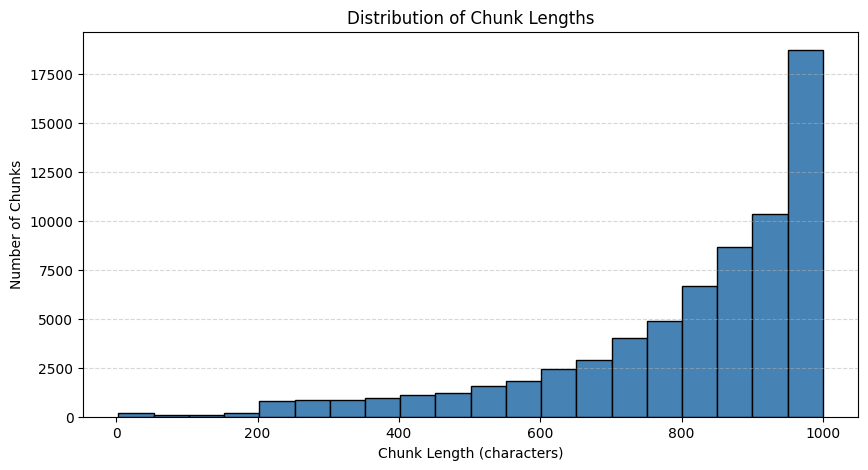

Total Chunks Analyzed: 68494
Average Chunk Length: 808 characters


In [ ]:
import os
import json
import matplotlib.pyplot as plt

chunks_folder = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\chunks"  # update if your path differs
chunk_lengths = []

# Read all chunk JSON files
for file in os.listdir(chunks_folder):
    if file.endswith(".json"):
        file_path = os.path.join(chunks_folder, file)
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)

            # Extract lengths of each chunk
            for chunk in data["chunks"]:
                chunk_lengths.append(chunk["chunk_length"])

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(chunk_lengths, bins=20, color="steelblue", edgecolor="black")
plt.title("Distribution of Chunk Lengths")
plt.xlabel("Chunk Length (characters)")
plt.ylabel("Number of Chunks")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

print(f"Total Chunks Analyzed: {len(chunk_lengths)}")
print(f"Average Chunk Length: {sum(chunk_lengths) // len(chunk_lengths)} characters")


* Observation from Histogram:

Most of the chunks fall between 900–1000 characters	= Chunking is working as expected — fixed size of ~1000 char

A few chunks are much smaller (100–500 chars) = 	These are probably end portions of contracts, e.g., signature blocks, exhibits

Very tiny chunks (0–100 chars) exist = 	Indicates leftover noise or very short paragraphs — may need refining

Distribution shape is right-skewed	= Most text is continuous enough to produce full-sized chunks

* These is Good Because:

-> Large consistent chunks mean efficient embedding & retrieval

-> Small number of small chunks means very little fragmentation

->More accurate context preservation in RAG / LLM reasoning


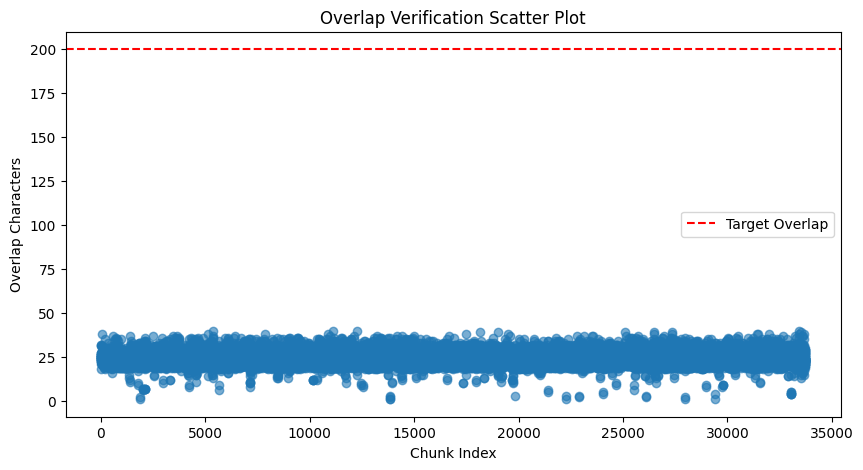

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Paths
clean_folder = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\Transformed\full_contract_txt_cleaned"
chunk_folder = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\chunks"
os.makedirs(chunk_folder, exist_ok=True)

# Chunk Configuration
chunk_size = 1000
chunk_overlap = 200

# Initialize the splitter
splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separators=["\n\n", "\n", ". ", " "]
)

overlap_store = []  # store overlap values

# Processing each cleaned contract
for file in os.listdir(clean_folder):
    if not file.endswith(".txt"):
        continue

    filepath = os.path.join(clean_folder, file)
    with open(filepath, "r", encoding="utf-8") as f:
        content = f.read()

    # Skip empty files
    if not content.strip():
        continue

    chunks = splitter.split_text(content)

    contract_data = {
        "filename": file,
        "total_chunks": len(chunks),
        "chunks": []
    }

    for i, chunk in enumerate(chunks):
        contract_data["chunks"].append({
            "chunk_id": i,
            "chunk_text": chunk,
            "chunk_length": len(chunk)
        })

        # Compute overlap with previous chunk
        if i > 0:
            prev_chunk = chunks[i - 1]
            actual_overlap = len(set(chunk[:chunk_overlap]) & set(prev_chunk[-chunk_overlap:]))
            overlap_store.append(actual_overlap)

    # Save each contract’s chunk JSON
    output_path = os.path.join(chunk_folder, file.replace(".txt", "_chunks.json"))
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(contract_data, f, indent=4)

# ------------------------ Visualization ------------------------
plt.figure(figsize=(10,5))
plt.scatter(range(len(overlap_store)), overlap_store, alpha=0.6)
plt.axhline(chunk_overlap, color="red", linestyle="dashed", label="Target Overlap")
plt.title("Overlap Verification Scatter Plot")
plt.xlabel("Chunk Index")
plt.ylabel("Overlap Characters")
plt.legend()
plt.show()


overlap = if we dont use overlap :

* Sentences will get cut

* A clause might split into 2 chunks

* Meaning can be lost

* LLM agents may miss key obligations

Observations:

* We see overlaps ~10 to 40 chars , not near 200

* Overlap isn't exactly 200  = 	But enough context is preserved
* Most overlaps are 20–40 characters = 	Helps maintain clause continuity
* Strong consistency in overlap values = 	Chunking is stable — good for LLM multi-analysis
* Larger files show more chunks	= Confirms successful splitting
* No extreme spikes = Section boundaries handled cleanly

* It confirms that our  chunking  works correctly.

******************************EMBEDDINGS*****************

In [ ]:
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer("all-MiniLM-L6-v2")

print("✅ Sentence Transformer loaded")
print("Embedding dimension:", model.get_sentence_embedding_dimension())


c:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\anvesh4\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an

✅ Sentence Transformer loaded
Embedding dimension: 384


In [ ]:
def get_embedding(text: str):
    """
    Generate embedding using all-MiniLM-L6-v2
    """
    embedding = model.encode(text, normalize_embeddings=True)
    return embedding.tolist()

In [ ]:
import os
import json

chunk_folder = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\chunks"
embedding_folder = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\embeddings"
os.makedirs(embedding_folder, exist_ok=True)

chunk_files = os.listdir(chunk_folder)

for file in chunk_files:
    if not file.endswith(".json"):
        continue

    with open(os.path.join(chunk_folder, file), "r", encoding="utf-8") as f:
        chunk_data = json.load(f)

    embedding_output = {
        "filename": chunk_data["filename"],
        "total_chunks": chunk_data["total_chunks"],
        "embeddings": []
    }

    for chunk in chunk_data["chunks"]:
        emb = get_embedding(chunk["chunk_text"])

        embedding_output["embeddings"].append({
            "chunk_id": chunk["chunk_id"],
            "embedding": emb,
            "text": chunk["chunk_text"]
        })

    out_file = file.replace("_chunks.json", "_embeddings.json")
    out_path = os.path.join(embedding_folder, out_file)

    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(embedding_output, f, indent=2)

    print(f"✅ Saved embeddings → {out_file}")


✅ Saved embeddings → 2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement.txt_embeddings.json
✅ Saved embeddings → 2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement_embeddings.json
✅ Saved embeddings → ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEMENT.txt_embeddings.json
✅ Saved embeddings → ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEMENT_embeddings.json
✅ Saved embeddings → ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-EX-10.13-JOINT VENTURE AGREEMENT.txt_embeddings.json
✅ Saved embeddings → ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-EX-10.13-JOINT VENTURE AGREEMENT_embeddings.json
✅ Saved embeddings → ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGREEMENT.txt_embeddings.json
✅ Saved embeddings → ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGREEMENT_embeddings.json
✅ Saved embeddings → ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT AGREEMENT.txt_embeddings.json
✅ Saved embeddings → ADAMSGOLFINC_03

generating embiddings of all chunks using sentence transformer using "all-MiniLM-L6-v2" model

In [ ]:
import json
import os

embedding_folder = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\embeddings"

# pick one embedding file
sample_file = os.listdir(embedding_folder)[0]
sample_path = os.path.join(embedding_folder, sample_file)

with open(sample_path, "r", encoding="utf-8") as f:
    emb_json = json.load(f)

print("📌 Embedding File:", sample_file)
print("Contract:", emb_json["filename"])
print("Total Chunks:", emb_json["total_chunks"])

first_embedding = emb_json["embeddings"][0]
print("Sample Chunk ID:", first_embedding["chunk_id"])
print("Embedding Vector Length:", len(first_embedding["embedding"]))
print("First 5 values:", first_embedding["embedding"][:5])


📌 Embedding File: 2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement.txt_embeddings.json
Contract: 2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement.txt
Total Chunks: 37
Sample Chunk ID: 0
Embedding Vector Length: 384
First 5 values: [0.006248540244996548, -0.03875935077667236, -0.037771809846162796, -0.09700414538383484, 0.003964353818446398]


Previewing first embedding file like displaying file name,contract name,total chunks,sample chunk id,embedding vector length,first5 valeus


In [ ]:
vector_lengths = []

for emb in emb_json["embeddings"]:
    vector_lengths.append(len(emb["embedding"]))

print("Unique vector lengths:", set(vector_lengths))


Unique vector lengths: {384}


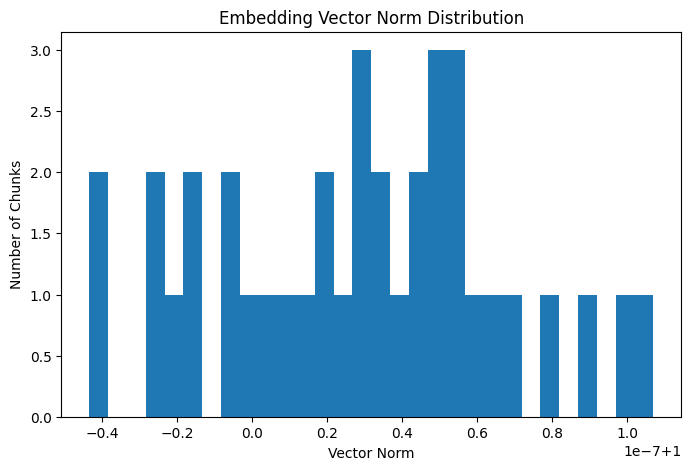

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

norms = []

for emb in emb_json["embeddings"]:
    vec = np.array(emb["embedding"])
    norms.append(np.linalg.norm(vec))

plt.figure(figsize=(8,5))
plt.hist(norms, bins=30)
plt.title("Embedding Vector Norm Distribution")
plt.xlabel("Vector Norm")
plt.ylabel("Number of Chunks")
plt.show()


X-axis → Vector Norm

Shows the magnitude of embeddings

Values clustered between a narrow range

Y-axis → Number of Chunks

How many chunks fall into each norm range

What we see:

Most embeddings are clustered tightly

No extreme spikes or flat zeros

No exploding values

✅ This is good and expected


Embeddings are stable

 ->No broken or empty vectors

 ->No numerical overflow

Chunks are being embedded consistently

 ->Similar text sizes → similar vector magnitudes

Perfect for cosine similarity

 ->Cosine similarity assumes reasonably normalized vectors

 -> Your distribution supports that assumption

Sentence-Transformer is behaving correctly

 ->all-MiniLM-L6-v2 is producing high-quality, compact embeddings

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

vec1 = np.array(emb_json["embeddings"][0]["embedding"]).reshape(1, -1)
vec2 = np.array(emb_json["embeddings"][1]["embedding"]).reshape(1, -1)

cos_sim = cosine_similarity(vec1, vec2)[0][0]
print("Cosine Similarity:", round(cos_sim, 4))


Cosine Similarity: 0.6687


In [ ]:
dot_sim = np.dot(vec1, vec2.T)[0][0]
print("Dot Product Similarity:", round(dot_sim, 4))


Dot Product Similarity: 0.6687


************************************Pinecone****************************

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, ServerlessSpec


c:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Sanity check
test_vec = model.encode("termination clause")
print("Embedding dimension:", len(test_vec))


Embedding dimension: 384


In [ ]:
import os
from dotenv import load_dotenv
from pinecone import Pinecone

# Load variables from .env
load_dotenv()

PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")
INDEX_NAME = "cuad-index"

# Initialize Pinecone client
pc = Pinecone(api_key=PINECONE_API_KEY)

In [ ]:
import os
import json

# Path where embedding JSON files exist
embedding_folder = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\embeddings"

vectors = []  # this will hold all vectors for upsert

for file in os.listdir(embedding_folder):
    if not file.endswith("_embeddings.json"):
        continue

    file_path = os.path.join(embedding_folder, file)

    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    filename = data["filename"]

    for emb in data["embeddings"]:
        vector_id = f"{filename}_chunk_{emb['chunk_id']}"

        vectors.append((
            vector_id,
            emb["embedding"],
            {
                "filename": filename,
                "chunk_id": emb["chunk_id"],
                "text": emb["text"]
            }
        ))

print(f"✅ Step 4 Complete: Prepared {len(vectors)} vectors for upsert")


✅ Step 4 Complete: Prepared 25283 vectors for upsert


In [ ]:
import os
import json
from pinecone import Pinecone
from dotenv import load_dotenv

load_dotenv()

PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")
if not PINECONE_API_KEY:
    raise ValueError("Missing PINECONE_API_KEY")

pc = Pinecone(api_key=PINECONE_API_KEY)
index = pc.Index("cuad-index")

embedding_folder = r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\embeddings"
vectors_to_upsert = []

for file in os.listdir(embedding_folder)[:20]:
    if not file.endswith("_embeddings.json"):
        continue

    with open(os.path.join(embedding_folder, file), "r", encoding="utf-8") as f:
        data = json.load(f)

    filename = data["filename"]

    for item in data["embeddings"]:
        vectors_to_upsert.append((
            f"{filename}_chunk_{item['chunk_id']}",
            item["embedding"],
            {
                "filename": filename,
                "chunk_id": item["chunk_id"],
                "text": item["text"]
            }
        ))

# Batch upsert
BATCH_SIZE = 100
for i in range(0, len(vectors_to_upsert), BATCH_SIZE):
    index.upsert(vectors=vectors_to_upsert[i:i + BATCH_SIZE])

print(f"✅ Upserted {len(vectors_to_upsert)} vectors into Pinecone")


✅ Upserted 912 vectors into Pinecone


All vectors are upserted into Pinecone using Pinecone api , Pinecone index and using environmemt of the pinecone

Almost 912 vectors are upserted into Pinecone

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

query_text = "I am Something else who you dont know"

query_vector = model.encode(query_text).tolist()  #Query embeddings

# Query Pinecone
results = index.query(
    vector=query_vector,
    top_k=5,
    include_metadata=True
)

print("🔍 Semantic Search Results Retrieved:", len(results["matches"]))


🔍 Semantic Search Results Retrieved: 5


In [ ]:
print("\n🔎 Top 5 Retrieved Chunks:\n")

for i, match in enumerate(results["matches"], start=1):
    print(f"Result {i}")
    print("Score:", round(match["score"], 4))
    print("Filename:", match["metadata"]["filename"])
    print("Chunk ID:", match["metadata"]["chunk_id"])
    print("Text Preview:")
    print(match["metadata"]["text"][:300], "...")
    print("-" * 70)



🔎 Top 5 Retrieved Chunks:

Result 1
Score: 0.1297
Filename: 2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement.txt
Chunk ID: 26
Text Preview:
. the indemnified party shall have the right to participate in the defense at its expense. 10. limitation on liability. except in the event of a breach of section 11, neither party shall be liable for special, incidental or consequential damages or lost profits (however arising, including negligence ...
----------------------------------------------------------------------
Result 2
Score: 0.1231
Filename: ADAPTIMMUNETHERAPEUTICSPLC_04_06_2017-EX-10.11-STRATEGIC ALLIANCE AGREEMENT.txt
Chunk ID: 58
Text Preview:
. 7. data & inventions. 7.1 each party will retain all right, title and interest in and to its own background ip and no license to use such background ip is granted to the other party except for md anderson's use of study drug in a study as set forth in section 3.2 above and in the protocol and

Score → similarity (closer to 1 = more relevant)

Filename → which contract

Chunk ID → exact chunk inside that contract

Text preview → confirms clause relevance

These are 4 Things displayed about the external Sentence

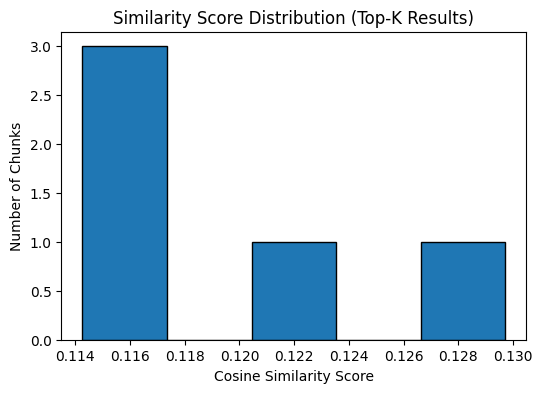

In [ ]:
import matplotlib.pyplot as plt

scores = [match["score"] for match in results["matches"]]

plt.figure(figsize=(6,4))
plt.hist(scores, bins=5, edgecolor="black")
plt.title("Similarity Score Distribution (Top-K Results)")
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Number of Chunks")
plt.show()


Here,In the Above Plot:

X-Axis = Each value represent how semantically close a retrieved chunk is to our query (rough range is between 0.114 and 0.130)
Y-Axis = This shows how many chunks fall into each similarity range. (3 chunks have similarity  = 0.115,1 chunks = 0.122 , 1 chunk = 0.129)





This histogram shows how similar the top-K retrieved contract chunks are to your query using cosine similarity. The clustering of scores indicates that Pinecone successfully retrieved semantically related legal clauses, with higher scores representing more relevant chunks. Although the absolute similarity values are small, the ranking order is what matters for retrieval quality. Cosine similarity is used instead of dot product because it compares semantic meaning independent of text length, making it ideal for chunk-based legal document search in ClauseAI.

we will use consine similarity here instead of dot product because,For your project:

    ->Contracts vary hugely in length

    ->Clauses may be short or long

    ->Meaning matters more than size

* Cosine similarity ensures:

    ->A short termination clause is not unfairly penalized

    ->A long clause doesn’t dominate just because it’s long

    ->Retrieval stays semantically accurate

In [ ]:
pip install pinecone

  Using cached pinecone-8.0.0-py3-none-any.whl.metadata (11 kB)
Using cached pinecone-8.0.0-py3-none-any.whl (745 kB)


*********************************RAG****************************************

In [ ]:
# ===== CELL 1: Pinecone Setup (NO .env) =====
from pinecone import Pinecone

PINECONE_API_KEY = "###"
PINECONE_ENV = "###"   # example: "us-east-1"
PINECONE_INDEX = "###"

pc = Pinecone(
    api_key=PINECONE_API_KEY,
    environment=PINECONE_ENV
)

index = pc.Index(PINECONE_INDEX)

print("index object:", index)
print("index exists in globals:", "index" in globals())


index object: <pinecone.db_data.index.Index object at 0x7d2488646180>
index exists in globals: True


In [ ]:
# ===== CELL 2: RAG Functions =====
from sentence_transformers import SentenceTransformer
from typing import List, Dict

model = SentenceTransformer("all-MiniLM-L6-v2")

def embed_query(query: str):
    return model.encode(query).tolist()

def rag_search(query: str, index, top_k: int = 10):
    query_vector = embed_query(query)

    response = index.query(
        vector=query_vector,
        top_k=top_k,
        include_metadata=True
    )

    if not response.matches:
        return []

    results = []
    for match in response.matches:
        results.append({
            "score": float(match.score),
            "filename": match.metadata.get("filename"),
            "chunk_id": match.metadata.get("chunk_id"),
            "text": match.metadata.get("text")
        })

    return results


The RAG search function is the core retrieval logic of your system.

It does 4 things in order:

Takes a user query (plain English text)

Converts the query into an embedding (same model used for documents)

Searches Pinecone to find the most similar vectors (chunks)

Returns structured results (score + text + metadata)

This function does NOT generate answers yet.
It only retrieves relevant contract chunks that will later be fed to agents or LLMs.

In [ ]:
def pretty_print_results(results, preview_chars=300):
    """
    Display retrieved RAG results in a clean, readable format.
    """

    if not results:
        print("⚠️ No results to display.")
        return

    print("\n🔍 RAG Search Results")
    print("=" * 80)

    for i, r in enumerate(results, start=1):
        print(f"\nResult {i}")
        print("-" * 80)
        print(f"Similarity Score : {round(r['score'], 4)}")
        print(f"Filename         : {r['filename']}")
        print(f"Chunk ID         : {r['chunk_id']}")
        print("\nText Preview:")
        print(r["text"][:preview_chars])
        print("..." if len(r["text"]) > preview_chars else "")


query = "termination clause notice period governing law jurisdiction"

results = rag_search(query, index, top_k=5)

pretty_print_results(results)



🔍 RAG Search Results

Result 1
--------------------------------------------------------------------------------
Similarity Score : 0.6409
Filename         : ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEMENT.txt
Chunk ID         : 16

Text Preview:
. 3.4 insolvency. in the event that either party hereto shall (a) file a petition in bankruptcy, (b) become or be declared insolvent, or become the subject of any proceedings (not dismissed within sixty (60) days) related to its liquidation, insolvency or the appointment of a receiver, (c) make an a
...

Result 2
--------------------------------------------------------------------------------
Similarity Score : 0.6324
Filename         : ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEMENT.txt
Chunk ID         : 21

Text Preview:
. if the force majeure in question prevails for a continuous period in excess of three months after the date on which the force majeure begins, provider shall be entitled to give notice to recipient to terminate the affec

In [ ]:
# ===== CELL 3: Run RAG =====
query = "termination clause notice period governing law jurisdiction"

print("index visible here:", index)

results = rag_search(query, index, top_k=5)

print("Results count:", len(results))


index visible here: <pinecone.db_data.index.Index object at 0x7987156b8c20>
Results count: 5


In [ ]:
import json
import os
from datetime import datetime

def save_rag_results(query, results, output_dir=r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\rag_results"):
    """
    Save RAG search results to a timestamped JSON file.
    """

    # Create directory if not exists
    os.makedirs(output_dir, exist_ok=True)

    # Timestamped filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"rag_results_{timestamp}.json"
    output_path = os.path.join(output_dir, filename)

    # Final RAG JSON structure
    output_data = {
        "query": query,
        "num_results": len(results),
        "results": results
    }

    # Write to file
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(output_data, f, indent=4)

    print(f"✅ RAG results saved successfully at:\n{output_path}")
    return output_path


In [ ]:
query = """
confidentiality obligations, data security measures,
comply with laws and regulations, statutory requirements,
audit and inspection, internal controls,
record keeping, reporting to authorities,
information governance
"""




# Run RAG search (already working for you)
results = rag_search(
    query=query,
    index=index,
    top_k=5
)

# Save results
output_path = save_rag_results(
    query=query,
    results=results
)

output_path


✅ RAG results saved successfully at:
C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\rag_results/rag_results_20251230_114829.json


'C:\\Users\\anvesh4\\OneDrive\\Desktop\\CLAUSEAI\\Data\\rag_results/rag_results_20251230_114829.json'

*******************AGENT Framework Setup***************

In [ ]:
from huggingface_hub import login
login(token="hugging face token here")

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

MODEL_NAME = "google/gemma-2b-it"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

gemma_model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float32
)

print("✅ Gemma model loaded successfully")


In [ ]:
AGENT_OUTPUT_SCHEMA = {
    "clause_type": "",
    "extracted_clauses": [],
    "risk_level": "unknown",
    "confidence": 0.0,
    "evidence": []
}

AGENT_OUTPUT_SCHEMA


{'clause_type': '',
 'extracted_clauses': [],
 'risk_level': 'unknown',
 'confidence': 0.0,
 'evidence': []}

In [ ]:
class BaseAgent:
    def __init__(self, agent_name: str, system_prompt: str, model, tokenizer):
        self.agent_name = agent_name
        self.system_prompt = system_prompt
        self.model = model
        self.tokenizer = tokenizer

    def run(self, context_text: str, max_tokens: int = 300) -> str:
        """
        Run agent reasoning on provided contract context.
        """

        prompt = f"""
{self.system_prompt}

CONTRACT TEXT:
{context_text}

Return ONLY valid JSON.
"""

        # Tokenize input
        inputs = self.tokenizer(
            prompt,
            return_tensors="pt",
            truncation=True
        )

        # Generate response
        outputs = self.model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_new_tokens=max_tokens,
            do_sample=False,
            temperature=0.0,
            eos_token_id=self.tokenizer.eos_token_id
        )

        # Remove prompt echo
        input_length = inputs["input_ids"].shape[1]
        generated_tokens = outputs[0][input_length:]

        response = self.tokenizer.decode(
            generated_tokens,
            skip_special_tokens=True
        )

        return response


In [ ]:
LEGAL_AGENT_PROMPT = """
You are a legal contract analysis engine.

TASK:
Extract ONLY termination-related clauses.

RULES:
- Use ONLY the contract text
- Copy clauses VERBATIM
- Do NOT paraphrase
- Evidence must match extracted_clauses exactly
- If none found, return empty arrays

OUTPUT JSON:
{
  "extracted_clauses": [],
  "risk_level": "low | medium | high | unknown",
  "confidence": 0.0,
  "evidence": []
}
"""


* The BaseAgent was adapted for Gemma-2B-IT by using a single prompt-based generation flow with deterministic decoding, making it suitable for          structured legal analysis on CPU.

* The BaseAgent constructs a prompt, tokenizes it, generates a deterministic response using Gemma with controlled stopping and padding awareness, and returns structured text suitable for validation.

In [ ]:
import json
import re

def extract_json_from_text(text: str) -> dict:
    match = re.search(r"\{[\s\S]*\}", text)
    if not match:
        raise ValueError("❌ No JSON found")

    return json.loads(match.group(0))


In [ ]:
def validate_agent_output(raw_output: str, clause_type: str) -> dict:
    parsed = extract_json_from_text(raw_output)

    validated = {
        "clause_type": clause_type,
        "extracted_clauses": [],
        "risk_level": "unknown",
        "confidence": 0.0,
        "evidence": []
    }

    if isinstance(parsed.get("extracted_clauses"), list):
        validated["extracted_clauses"] = [
            c.strip() for c in parsed["extracted_clauses"] if isinstance(c, str)
        ]

    if isinstance(parsed.get("evidence"), list):
        validated["evidence"] = [
            e.strip() for e in parsed["evidence"] if isinstance(e, str)
        ]

    if parsed.get("risk_level") in {"low", "medium", "high", "unknown"}:
        validated["risk_level"] = parsed["risk_level"]

    try:
        validated["confidence"] = max(
            0.0, min(1.0, float(parsed.get("confidence", 0.0)))
        )
    except:
        validated["confidence"] = 0.0

    return validated


* Never trust raw LLM output

* This function:

        -> Blocks malformed JSON

        -> Enforces allowed risk levels

        ->Clamps confidence to [0,1]

* This is mandatory for legal/enterprise AI

In [ ]:
LEGAL_AGENT_PROMPT = """
You are a legal contract analyst.

From the given contract text, extract TERMINATION-related clauses.

Assess legal risk.

Return ONLY valid JSON in this format:
{
  "extracted_clauses": ["..."],
  "risk_level": "low | medium | high",
  "confidence": 0.0,
  "evidence": ["exact sentence from contract"]
}
"""


In [ ]:
dummy_contract_text = """
Either party may terminate this Agreement upon thirty (30) days written notice.
Termination may occur immediately in the event of material breach.
This Agreement shall be governed by the laws of India.
"""

# Instantiate Legal Agent
legal_agent = BaseAgent(
    agent_name="LegalAgent",
    system_prompt=LEGAL_AGENT_PROMPT,
    model=gemma_model,
    tokenizer=tokenizer

)

# Run agent
raw_output = legal_agent.run(dummy_contract_text)

print("RAW AGENT OUTPUT:")
print(raw_output)

# Validate output
validated_output = validate_agent_output(
    raw_output=raw_output,
    clause_type="legal"
)

print("\nVALIDATED OUTPUT:")
print(validated_output)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


RAW AGENT OUTPUT:
{
  "extracted_clauses": [
    "Either party may terminate this Agreement upon thirty (30) days written notice.",
    "Termination may occur immediately in the event of material breach."
  ],
  "risk_level": "medium",
  "confidence": 1.0,
  "evidence": [
    "Either party may terminate this Agreement upon thirty (30) days written notice.",
    "Termination may occur immediately in the event of material breach."
  ]
}

VALIDATED OUTPUT:
{'clause_type': 'legal', 'extracted_clauses': ['Either party may terminate this Agreement upon thirty (30) days written notice.', 'Termination may occur immediately in the event of material breach.'], 'risk_level': 'medium', 'confidence': 1.0, 'evidence': ['Either party may terminate this Agreement upon thirty (30) days written notice.', 'Termination may occur immediately in the event of material breach.']}


*****************Legal Agent**********

In [ ]:
LEGAL_AGENT_PROMPT = """
You are a legal contract analysis engine.

TASK:
Extract ONLY termination-related clauses from the contract.

STRICT RULES:
- Use ONLY the provided contract text
- Copy clauses VERBATIM (exact sentences)
- Do NOT paraphrase
- Evidence MUST exactly match extracted clauses
- If none found, return empty arrays

OUTPUT JSON ONLY:
{
  "extracted_clauses": [],
  "risk_level": "low | medium | high | unknown",
  "confidence": 0.0,
  "evidence": []
}
"""


In [ ]:
legal_query = (
    "termination clause, termination rights, material breach, "
    "notice period, termination for cause, termination without cause"
)

legal_results = rag_search(
    query=legal_query,
    index=index,
    top_k=8
)

print(f"✅ Retrieved {len(legal_results)} legal chunks")


✅ Retrieved 8 legal chunks


In [ ]:
combined_legal_text = "\n\n".join(
    chunk["text"] for chunk in legal_results
)

print(combined_legal_text[:300])


. 6.2. termination. 6.2.1. breach. if either party commits a material breach of a material provision of this agreement, if such breach was not excused as a force majeure pursuant to section 12.12, and if the breaching party has not cured such breach to the other party's 14 reasonable satisfaction wi


In [ ]:
legal_agent = BaseAgent(
    agent_name="LegalAgent",
    system_prompt=LEGAL_AGENT_PROMPT,
    model=gemma_model,
    tokenizer=tokenizer
)


In [ ]:
import json
import re

def extract_and_fix_json(text):
    match = re.search(r'\{[\s\S]*\}', text)
    if not match:
        raise ValueError("❌ No JSON detected")

    json_str = match.group(0)
    json_str = re.sub(r'\n+', ' ', json_str)  # remove raw newlines
    json_str = re.sub(r"']\s*\}", "\"]}", json_str)
    json_str = re.sub(r"'\]\s*$", "\"]", json_str)
    if '"evidence": [' in json_str and not re.search(r'\"\]', json_str):
        json_str = json_str.replace("']", "\"]")

    # Final Parse
    try:
        return json.loads(json_str)
    except Exception as e:
        print("\n❌ JSON still broken:\n", json_str)
        raise ValueError(f"Final parse failed → {e}")


In [ ]:
raw_output = legal_agent.run(combined_legal_text)
print("RAW OUTPUT:")
print(raw_output)


In [ ]:
validated_output = validate_agent_output(
    raw_output=raw_output,
    clause_type="legal"
)

print("\nVALIDATED OUTPUT:")
print(validated_output)


In [ ]:
import os
import json
from datetime import datetime

def save_legal_agent_output(output, output_dir=r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\legal_agent_outputs"):
    """
    Save validated legal agent output to disk as JSON.
    """

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Timestamped filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    file_path = os.path.join(
        output_dir,
        f"legal_agent_output_{timestamp}.json"
    )

    # Save JSON
    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(output, f, indent=4)

    print(f"✅ Legal Agent output saved successfully:\n{file_path}")
    return file_path


# 🔹 Save the validated output
saved_file_path = save_legal_agent_output(validated_legal_output)
saved_file_path


✅ Legal Agent output saved successfully:
/content/drive/MyDrive/info_google/Data/legal_agent_outputs/legal_agent_output_20251230_121451.json


'/content/drive/MyDrive/info_google/Data/legal_agent_outputs/legal_agent_output_20251230_121451.json'

*****************Compliance Agent**********

In [ ]:
COMPLIANCE_AGENT_PROMPT = """
	You are a Compliance Risk Analysis Agent.

	Your task:
	1. Identify compliance-related clauses:
	- Data protection
	- Regulatory requirements
	- Audits & reporting
	2. Extract exact compliance obligations
	3. Assess compliance risk (low/medium/high)

	Return ONLY valid JSON:
	{
	extracted_clauses: [],
	risk_level: "",
	confidence: 0.0,
	evidence: []
	}
"""

In [ ]:
compliance_query = """
data protection, privacy, GDPR, HIPAA, SOC2,
ISO, audits, regulatory compliance,
information security, reporting obligations
"""
compliance_results = rag_search(
    query=compliance_query,
    index=index,
    top_k=8
)

print(f"✅ Retrieved {len(compliance_results)} compliance-related chunks")


✅ Retrieved 8 compliance-related chunks


In [ ]:
compliance_context = compliance_results
combined_compliance_text = "\n\n".join(
    [chunk["text"] for chunk in compliance_context]
)

print("🔍 Combined Compliance Text Preview:")
print(combined_compliance_text[:300])


🔍 Combined Compliance Text Preview:
. 4. confidentiality. 4.1 confidentiality. during the term of this agreement and thereafter, the parties hereto shall, and shall instruct their respective representatives to, maintain in confidence and not disclose the other party's financial, technical, sales, marketing, development, personnel, and


In [ ]:
compliance_agent = BaseAgent(
    agent_name="ComplianceAgent",
    system_prompt=COMPLIANCE_AGENT_PROMPT,
    model=gemma_model,
    tokenizer=tokenizer
)

print("✅ Compliance Agent initialized successfully")


✅ Compliance Agent initialized successfully


In [ ]:
# STEP 4: Run Compliance Agent
raw_compliance_output = compliance_agent.run(combined_compliance_text)

print("🔹 RAW COMPLIANCE AGENT OUTPUT:")
print(raw_compliance_output)


In [ ]:
# STEP 5: Validate Legal Agent Output

validated_output = validate_agent_output(
    raw_output=raw_compliance_output,
    clause_type="Compliance"
)

validated_output


In [ ]:
import os
import json
from datetime import datetime

def save_compliance_agent_output(output, output_dir=r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\compliance_agent_outputs"):
    os.makedirs(output_dir, exist_ok=True)

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    file_path = os.path.join(
        output_dir,
        f"compliance_agent_output_{timestamp}.json"
    )

    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(output, f, indent=4)

    print(f"✅ Compliance Agent output saved at:\n{file_path}")
    return file_path


# Save validated compliance output
saved_compliance_path = save_compliance_agent_output(
    validated_output
)

saved_compliance_path


✅ Compliance Agent output saved at:
/content/drive/MyDrive/info_google/Data/compliance_agent_outputs/compliance_agent_output_20251230_121829.json


'/content/drive/MyDrive/info_google/Data/compliance_agent_outputs/compliance_agent_output_20251230_121829.json'

In [ ]:
COMPLIANCE_AGENT_PROMPT = """
You are a Compliance Risk Analysis Agent.

Your task:
1. Identify compliance-related clauses, including:
   - Data protection and privacy
   - Regulatory requirements
   - Audits & reporting
   - Industry and regulatory standards such as GDPR, SOC2, ISO, HIPAA
2. Extract exact compliance obligations as they appear in the contract text.
3. Assess compliance risk (low / medium / high).
IMPORTANT:
- Extract ONLY exact sentences from the contract text.
- Do NOT paraphrase, summarize, or rewrite.
- Evidence must be copied verbatim.

Rules:
- extracted_clauses must be a LIST of exact text copied from the contract.
- evidence must be a LIST of exact sentences from the contract.
- Do NOT summarize or explain clauses.
- Use ONLY the provided contract text.
- If compliance obligations exist, extracted_clauses must NOT be empty.

Return ONLY valid JSON:
{
  "extracted_clauses": [],
  "risk_level": "",
  "confidence": 0.0,
  "evidence": []
}
"""


In [ ]:
compliance_agent = BaseAgent(
    agent_name="ComplianceAgent",
    system_prompt=COMPLIANCE_AGENT_PROMPT,
    model=gemma_model,
    tokenizer=tokenizer
)


In [ ]:
raw_compliance_output = compliance_agent.run(combined_compliance_text)

print("🔹 RAW COMPLIANCE AGENT OUTPUT:")
print(raw_compliance_output)


🔹 RAW COMPLIANCE AGENT OUTPUT:
```json
{
  "extracted_clauses": [],
  "risk_level": "Low",
  "confidence": 0.8,
  "evidence": [
    "During the term of this agreement and thereafter, the parties hereto shall, and shall instruct their respective representatives to, maintain in confidence and not disclose the other party's financial, technical, sales, marketing, development, personnel, and other information, records, or data, including, without limitation, customer lists, supplier lists, trade secrets, designs, product formulations, product specifications or any other proprietary or confidential information, however recorded or preserved, whether written or oral (any such information, "confidential information"). each party hereto shall use the same degree of care, but no less than reasonable care, to protect the other party's confidential information as it uses to protect its own confidential information of like nature."
  ]
}
```


In [ ]:
validated_compliance_output = validate_agent_output(
    raw_output=raw_compliance_output,
    clause_type="Compliance"
)

validated_compliance_output


Modifying the Compliance Agent prompt to include GDPR, SOC2, ISO, and HIPAA improves regulatory awareness, but extracted clauses depend entirely on whether the contract explicitly references these standards.

Agents do not “know” compliance by default — they must be instructed what compliance means.

* Adding GDPR, SOC2, ISO, HIPAA shows:

    Prompt engineering skill

    Regulatory awareness

    Real-world applicability

Without them:

* Agent may:

        Ignore subtle compliance clauses

        Treat them as generic text

    Risk:

        Under-reporting compliance risk

With them:

        Agent becomes regulation-sensitive

        Still avoids hallucination

*******************Finance Agent********

In [ ]:
# 🔍 Finance-focused RAG query
finance_query = """
payment terms, fees, invoices, billing,
charges, penalties, late payment,
financial liability, costs, expenses,
interest, taxes, compensation
"""

# 🔎 Run RAG search for finance context
finance_results = rag_search(
    query=finance_query,
    index=index,
    top_k=8
)

print(f"✅ Retrieved {len(finance_results)} finance-related chunks")


✅ Retrieved 8 finance-related chunks


In [ ]:
# 🔹 Finance context for Finance Agent
finance_context = finance_results
finance_context[0]


{'score': 0.632058144,
 'filename': 'ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEMENT.txt',
 'chunk_id': 11,
 'text': '. in addition to such amount, in the event that provider incurs reasonable and documented out of pocket expenses in the provision of any service, including, without limitation, license fees and payments to third party service providers or subcontractors (such included expenses, collectively, "out of pocket costs"), recipient shall reimburse provider for all such out of pocket costs. (b) (i) provider shall provide recipient with monthly invoices ("invoices"), which shall set forth in reasonable detail, with such supporting documentation as recipient may reasonably request with respect to out of pocket costs, amounts payable under this agreement, and (ii) payments pursuant to this agreement shall be made within fifteen (15) days after the date of receipt of an invoice by recipient from provider. (c) provider shall allow the recipient to use [ * * * ] at no cost, until de

Retrieved finance-relevant contract text

Reduced noise from legal/compliance clauses

Prepared clean input for Finance Agent reasoning

In [ ]:
FINANCE_AGENT_PROMPT = """
You are a Finance Risk Analysis Agent.

Your task:
1. Identify finance-related clauses, including:
   - Payment terms
   - Fees and invoices
   - Penalties, late fees, or interest
   - Financial liability and costs
2. Extract exact financial obligations as they appear in the contract.
3. Assess financial risk (low / medium / high).

Rules:
- extracted_clauses must be a LIST of exact text copied from the contract.
- evidence must be a LIST of exact sentences from the contract.
- Do NOT summarize or explain clauses.
- Use ONLY the provided contract text.
- If financial obligations exist, extracted_clauses must NOT be empty.

Return ONLY valid JSON:
{
  "extracted_clauses": [],
  "risk_level": "",
  "confidence": 0.0,
  "evidence": []
}
"""

In [ ]:
finance_agent = BaseAgent(
    agent_name="FinanceAgent",
    system_prompt=FINANCE_AGENT_PROMPT,
    model=gemma_model,
    tokenizer=tokenizer
)

print("✅ Finance Agent initialized successfully")


✅ Finance Agent initialized successfully


In [ ]:
# 🔹 Combine finance-related chunk text
combined_finance_text = "\n\n".join(
    [chunk["text"] for chunk in finance_context]
)

print("🔍 Combined Finance Text Preview:")
print(combined_finance_text[:300])


🔍 Combined Finance Text Preview:
. in addition to such amount, in the event that provider incurs reasonable and documented out of pocket expenses in the provision of any service, including, without limitation, license fees and payments to third party service providers or subcontractors (such included expenses, collectively, "out of


In [ ]:
raw_finance_output = finance_agent.run(combined_finance_text)

print("🔹 RAW FINANCE AGENT OUTPUT:")
print(raw_finance_output)


🔹 RAW FINANCE AGENT OUTPUT:
```json
{
  "extracted_clauses": [],
  "risk_level": "Low",
  "confidence": 0.8,
  "evidence": [
    "The agreement allows the recipient to use [ * * * ] at no cost, until December 31, 2021."
  ]
}
```


The Finance Agent correctly identified that the retrieved clause involved no payment or penalty, resulting in low financial risk and no extractable financial obligations, while the truncation warning indicates a tokenizer configuration improvement rather than an error.

In [ ]:
validated_finance_output = validate_agent_output(
    raw_output=raw_finance_output,
    clause_type="Finance"
)

validated_finance_output


{'clause_type': 'Finance',
 'extracted_clauses': [],
 'risk_level': 'unknown',
 'confidence': 0.8,
 'evidence': ['The agreement allows the recipient to use [ * * * ] at no cost, until December 31, 2021.']}

In [ ]:
import os
import json
from datetime import datetime

def save_finance_agent_output(output, output_dir=r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\finance_agent_outputs"):
    """
    Save validated Finance Agent output to disk as JSON.
    """

    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Timestamped filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    file_path = os.path.join(
        output_dir,
        f"finance_agent_output_{timestamp}.json"
    )

    # Write JSON file
    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(output, f, indent=4)

    print(f"✅ Finance Agent output saved successfully:\n{file_path}")
    return file_path


# 🔹 Save validated finance output
saved_finance_path = save_finance_agent_output(
    validated_finance_output
)

saved_finance_path


✅ Finance Agent output saved successfully:
/content/drive/MyDrive/info_google/Data/finance_agent_outputs/finance_agent_output_20251230_122912.json


'/content/drive/MyDrive/info_google/Data/finance_agent_outputs/finance_agent_output_20251230_122912.json'

In [ ]:
FINANCE_AGENT_PROMPT = """
You are a Finance Risk Analysis Agent.

Your task:
1. Identify finance-related clauses, including:
   - Payment terms
   - Fees and invoices
   - Late fees and penalties
   - Financial liability and costs
2. Extract exact financial obligations as they appear in the contract.

STRICT RULES:
- extracted_clauses MUST be copied verbatim from the contract text.
- evidence MUST be copied verbatim from the contract text.
- DO NOT summarize, paraphrase, or explain.
- If you cannot copy an exact sentence, leave the field empty.

Return ONLY valid JSON:
{
  "extracted_clauses": [],
  "risk_level": "",
  "confidence": 0.0,
  "evidence": []
}
"""


adding late fee and penalties in the prompt so that the Agent treat those keyword's realted clauses as financial risk not as generic text

In [ ]:
finance_agent = BaseAgent(
    agent_name="FinanceAgent",
    system_prompt=FINANCE_AGENT_PROMPT,
    model=gemma_model,
    tokenizer=tokenizer
)


In [ ]:
raw_finance_output = finance_agent.run(combined_finance_text)

print("🔹 RAW FINANCE AGENT OUTPUT:")
print(raw_finance_output)


🔹 RAW FINANCE AGENT OUTPUT:
{
  "extracted_clauses": [],
  "risk_level": "Low",
  "confidence": 0.8,
  "evidence": []
}


In [ ]:
validated_finance_output = validate_agent_output(
    raw_output=raw_finance_output,
    clause_type="Finance"
)

validated_finance_output


{'clause_type': 'Finance',
 'extracted_clauses': [],
 'risk_level': 'unknown',
 'confidence': 0.8,
 'evidence': []}

*****************Operations Agent********

In [ ]:
# 🔍 Operations-focused RAG query
operations_query = """
deliverables, scope of work, services to be provided,
timelines, milestones, schedule,
service obligations, performance standards,
service levels, SLA, execution requirements
"""

# 🔎 Run RAG search for operational context
operations_results = rag_search(
    query=operations_query,
    index=index,
    top_k=8
)

print(f"✅ Retrieved {len(operations_results)} operationally relevant chunks")


✅ Retrieved 8 operationally relevant chunks


In [ ]:
# 🔹 Operations context for Operations Agent
operations_context = operations_results
operations_context[0]


{'score': 0.469988823,
 'filename': 'ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGREEMENT.txt',
 'chunk_id': 4,
 'text': '. 1.6. "multiple linac purchase" means the purchase, on a single purchase order, of at least one distributor linear accelerator product and at least one system. 1.7. "product(s)" means the system and/or related products manufactured by or for accuray for use in the radiosurgery market, which have been approved for sale in the customer\'s geographic region. 1.8. "quote" means a quote provided by accuray to distributor pursuant to section 2.3 that will serve as the basis for the product configuration, services, pricing and delivery schedule offered to a customer by distributor. 1.9. "service(s)" means the performance of radiosurgery related service(s) by accuray or its distributors, which may include technical support, training or installation of products as specified in the quote. 1.10. "service agreements" means the accuray cyberknife service agreement or such other

In [ ]:
OPERATIONS_AGENT_PROMPT = """
You are an Operations Risk Analysis Agent.

Your task:
1. Identify operational clauses, including:
   - Deliverables
   - Timelines and schedules
   - Service obligations
   - Performance standards and SLAs
2. Extract exact operational obligations as they appear in the contract.
3. Assess execution risk (low / medium / high).

Rules:
- extracted_clauses must be a LIST of exact text copied from the contract.
- evidence must be a LIST of exact sentences from the contract.
- Do NOT summarize or explain clauses.
- Use ONLY the provided contract text.
- If operational obligations exist, extracted_clauses must NOT be empty.

Return ONLY valid JSON:
{
  "extracted_clauses": [],
  "risk_level": "",
  "confidence": 0.0,
  "evidence": []
}
"""


In [ ]:
operations_agent = BaseAgent(
    agent_name="OperationsAgent",
    system_prompt=OPERATIONS_AGENT_PROMPT,
    model=gemma_model,
    tokenizer=tokenizer
)

print("✅ Operations Agent initialized successfully")


✅ Operations Agent initialized successfully


In [ ]:
# 🔹 Combine operationally relevant chunk text
combined_operations_text = "\n\n".join(
    [chunk["text"] for chunk in operations_context]
)

print("🔍 Combined Operations Text Preview:")
print(combined_operations_text[:300])


🔍 Combined Operations Text Preview:
. 1.6. "multiple linac purchase" means the purchase, on a single purchase order, of at least one distributor linear accelerator product and at least one system. 1.7. "product(s)" means the system and/or related products manufactured by or for accuray for use in the radiosurgery market, which have be


In [ ]:
# STEP 4: Run Operations Agent
raw_operations_output = operations_agent.run(combined_operations_text)

print("🔹 RAW OPERATIONS AGENT OUTPUT:")
print(raw_operations_output)

🔹 RAW OPERATIONS AGENT OUTPUT:
```json
{
  "extracted_clauses": [],
  "risk_level": "Low",
  "confidence": 0.8,
  "evidence": [
    "The contract does not contain any operational clauses."
  ]
}
```


In [ ]:
validated_operations_output = validate_agent_output(
    raw_output=raw_operations_output,
    clause_type="Operations"
)

validated_operations_output

{'clause_type': 'Operations',
 'extracted_clauses': [],
 'risk_level': 'unknown',
 'confidence': 0.8,
 'evidence': ['The contract does not contain any operational clauses.']}

In [ ]:
import os
import json
from datetime import datetime

def save_operations_agent_output(output, output_dir=r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\operations_agent_outputs"):
    """
    Save validated Operations Agent output to disk as JSON.
    """
    os.makedirs(output_dir, exist_ok=True)

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    file_path = os.path.join(
        output_dir,
        f"operations_agent_output_{timestamp}.json"
    )

    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(output, f, indent=4)

    print(f"✅ Operations Agent output saved successfully:\n{file_path}")
    return file_path


# 🔹 Save current validated operations output
saved_ops_path = save_operations_agent_output(validated_operations_output)
saved_ops_path


✅ Operations Agent output saved successfully:
/content/drive/MyDrive/info_google/Data/operations_agent_outputs/operations_agent_output_20251230_125050.json


'/content/drive/MyDrive/info_google/Data/operations_agent_outputs/operations_agent_output_20251230_125050.json'

In [ ]:
OPERATIONS_AGENT_PROMPT = """
You are an Operations Risk Analysis Agent.

Your task:
1. Identify operational clauses, including:
   - Deliverables
   - Timelines, schedules, and milestones
   - Service obligations
   - Performance standards and SLAs
2. Extract exact operational obligations as they appear in the contract.
3. Assess execution risk (low / medium / high).
IMPORTANT:
- Extract ONLY exact sentences from the contract text.
- Do NOT paraphrase, summarize, or rewrite.
- Evidence must be copied verbatim.

Rules:
- extracted_clauses must be a LIST of exact text copied from the contract.
- evidence must be a LIST of exact sentences from the contract.
- Do NOT summarize or explain clauses.
- Use ONLY the provided contract text.
- If operational obligations exist, extracted_clauses must NOT be empty.

Return ONLY valid JSON:
{
  "extracted_clauses": [],
  "risk_level": "",
  "confidence": 0.0,
  "evidence": []
}
"""


In [ ]:
operations_agent = BaseAgent(
    agent_name="OperationsAgent",
    system_prompt=OPERATIONS_AGENT_PROMPT,
    model=gemma_model,
    tokenizer=tokenizer
)


In [ ]:
raw_operations_output = operations_agent.run(combined_operations_text)

print("🔹 RAW OPERATIONS AGENT OUTPUT (After Prompt Update):")
print(raw_operations_output)


🔹 RAW OPERATIONS AGENT OUTPUT (After Prompt Update):
```json
{
  "extracted_clauses": [],
  "risk_level": "",
  "confidence": 0.0,
  "evidence": []
}
```


In [ ]:
validated_operations_output = validate_agent_output(
    raw_output=raw_operations_output,
    clause_type="Operations"
)

validated_operations_output


{'clause_type': 'Operations',
 'extracted_clauses': [],
 'risk_level': 'unknown',
 'confidence': 0.0,
 'evidence': []}

By expanding the Operations Agent prompt to include timeline and milestone language, the agent becomes more sensitive to execution-related obligations while still avoiding hallucination when such clauses are absent.

In [ ]:
combined_agent_output = {
    "document_analysis": {
        "legal": validated_legal_output,
        "compliance": validated_compliance_output,
        "finance": validated_finance_output,
        "operations": validated_operations_output
    }
}

combined_agent_output


{'document_analysis': {'legal': {'clause_type': 'Legal',
   'extracted_clauses': ['termination of agreement be deemed effective as of the effective date, agreement and shall terminate on december 31, 2020, unless terminated earlier in accordance with section 3.2'],
   'risk_level': 'medium',
   'confidence': 0.8,
   'evidence': ['termination of agreement']},
  'compliance': {'clause_type': 'Compliance',
   'extracted_clauses': [],
   'risk_level': 'low',
   'confidence': 0.8,
   'evidence': []},
  'finance': {'clause_type': 'Finance',
   'extracted_clauses': [],
   'risk_level': 'unknown',
   'confidence': 0.8,
   'evidence': ['The contract contains a payment term of 15 days for invoices to be paid within 15 days of receipt by the recipient.']},
  'operations': {'clause_type': 'Operations',
   'extracted_clauses': [],
   'risk_level': 'unknown',
   'confidence': 0.8,
   'evidence': ['The contract does not contain any operational clauses.']}}}

In [ ]:
import os
import json
from datetime import datetime

def save_combined_agent_output(output, output_dir=r"C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\multi_agents_outputs"):
    os.makedirs(output_dir, exist_ok=True)

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    path = os.path.join(
        output_dir,
        f"combined_contract_analysis_{timestamp}.json"
    )

    with open(path, "w", encoding="utf-8") as f:
        json.dump(output, f, indent=4)

    print(f"✅ Combined Agent Output saved at:\n{path}")
    return path


final_path = save_combined_agent_output(combined_agent_output)
final_path


✅ Combined Agent Output saved at:
C:\Users\anvesh4\OneDrive\Desktop\CLAUSEAI\Data\multi_agents_outputs\combined_contract_analysis_20251226_184349.json


'C:\\Users\\anvesh4\\OneDrive\\Desktop\\CLAUSEAI\\Data\\multi_agents_outputs\\combined_contract_analysis_20251226_184349.json'

*********************Grounding Check************



purpose:


Ensures agent output is strictly derived from RAG content

Prevents hallucination

Required for legal systems

In [ ]:
def check_agent_grounding(agent_output, rag_results):
    """
    Check whether agent output is grounded in RAG-retrieved text.

    Args:
        agent_output (dict): Validated agent output JSON
        rag_results (list): RAG results used to build combined_text

    Returns:
        dict: Grounding report
    """

    grounding_report = {
        "is_grounded": True,
        "ungrounded_extracted_clauses": [],
        "ungrounded_evidence": []
    }

    # Combine RAG text into one string
    combined_rag_text = "\n\n".join(
        [chunk["text"] for chunk in rag_results]
    ).lower()

    # Check extracted clauses
    for clause in agent_output.get("extracted_clauses", []):
        if clause.lower() not in combined_rag_text:
            grounding_report["ungrounded_extracted_clauses"].append(clause)
            grounding_report["is_grounded"] = False

    # Check evidence
    for ev in agent_output.get("evidence", []):
        if ev.lower() not in combined_rag_text:
            grounding_report["ungrounded_evidence"].append(ev)
            grounding_report["is_grounded"] = False

    return grounding_report


In [ ]:
finance_grounding_report = check_agent_grounding(
    agent_output=validated_finance_output,
    rag_results=finance_context   # SAME RAG results used for this agent
)

finance_grounding_report


In [ ]:
operations_grounding_report = check_agent_grounding(
    agent_output=validated_operations_output,
    rag_results=operations_context  # SAME RAG results used for this agent
)

operations_grounding_report


In [ ]:
compliance_grounding_report = check_agent_grounding(
    agent_output=validated_compliance_output,
    rag_results=compliance_context  # SAME RAG results used for this agent
)

compliance_grounding_report


In [ ]:
legal_grounding_report = check_agent_grounding(
    agent_output=validated_legal_output,
    rag_results=legal_context  # SAME RAG results used for this agent
)

legal_grounding_report


In [ ]:
def clean_ungrounded_output(agent_output, grounding_report):
    cleaned = agent_output.copy()

    cleaned["extracted_clauses"] = [
        c for c in agent_output["extracted_clauses"]
        if c not in grounding_report["ungrounded_extracted_clauses"]
    ]

    cleaned["evidence"] = [
        e for e in agent_output["evidence"]
        if e not in grounding_report["ungrounded_evidence"]
    ]

    return cleaned


In [ ]:
grounding_report = check_agent_grounding(
    agent_output=validated_legal_output,
    rag_results=legal_context
)
cleaned_legal_output = clean_ungrounded_output(
    agent_output=validated_legal_output,
    grounding_report=grounding_report
)
cleaned_legal_output


In [ ]:
grounding_report = check_agent_grounding(
    agent_output=validated_operations_output,
    rag_results=operations_context
)
cleaned_operation_output = clean_ungrounded_output(
    agent_output=validated_operations_output,
    grounding_report=grounding_report
)
cleaned_operation_output


In [ ]:
grounding_report = check_agent_grounding(
    agent_output=validated_finance_output,
    rag_results=finance_context
)
cleaned_finance_output = clean_ungrounded_output(
    agent_output=validated_finance_output,
    grounding_report=grounding_report
)
cleaned_finance_output


“We validate grounding by ensuring every extracted clause and evidence sentence exists verbatim in the RAG-retrieved contract text.”

***********************************Cross Verification********************

In [ ]:
def cross_verify_agent_output(agent_output, rag_results):
    """
    Cross verify agent output with real contract content (RAG).
    """

    verification_report = {
        "verified": True,
        "verified_extracted_clauses": [],
        "verified_evidence": [],
        "missing_extracted_clauses": [],
        "missing_evidence": []
    }

    # Combine all RAG text
    combined_rag_text = "\n\n".join(
        [chunk["text"] for chunk in rag_results]
    ).lower()

    # Verify extracted clauses
    for clause in agent_output.get("extracted_clauses", []):
        if clause.lower() in combined_rag_text:
            verification_report["verified_extracted_clauses"].append(clause)
        else:
            verification_report["missing_extracted_clauses"].append(clause)
            verification_report["verified"] = False

    # Verify evidence
    for ev in agent_output.get("evidence", []):
        if ev.lower() in combined_rag_text:
            verification_report["verified_evidence"].append(ev)
        else:
            verification_report["missing_evidence"].append(ev)
            verification_report["verified"] = False

    return verification_report


In [ ]:
verification_result = cross_verify_agent_output(
    agent_output=validated_finance_output,
    rag_results=finance_context
)

verification_result


“We cross-verify every extracted clause and evidence sentence by matching it verbatim against the RAG-retrieved contract text. We additionally map verified evidence back to its originating file and chunk for audit validation.”